In [2]:
# reload imported files automatically without restarting the kernel
%load_ext autoreload
%autoreload 2

In [3]:
from lib import *
from humanfriendly import format_size
from functools import reduce

In [4]:
all_online_networks = pd.read_csv(DATA_DIR_PATH / "online_social_networks.csv") # load online network data

# define gilter functions
small_online_networks = all_online_networks["nodes_qcut"] == "small"
medium_online_networks = all_online_networks["nodes_qcut"] == "medium"
large_online_networks = all_online_networks["nodes_qcut"] == "large"

In [5]:
all_online_networks.head()

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3460300,large
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22528,small
2,ego_social,facebook_107,1034,26749,51.74,47.00,122.05,51.91,0.43,0.50,9,1.00,Undirected,Unipartite,name feat circles,NaN,121856,medium
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19456,small
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11264,small


In [9]:
# calculate dataset sizes per group
all_online_networks.groupby("nodes_qcut").agg({"gml_file_size": [lambda val: format_size(val.sum(), binary=True), "count", "median"]})

gml_file_size                 
              <lambda_0> count     median
nodes_qcut                               
large           1.78 GiB    56  2254438.0
medium         30.55 MiB    56   382976.0
small           1.76 MiB    57    23552.0

In [10]:
# get total size of all online network datasets
format_size(reduce(lambda x, y: x + y, all_online_networks["gml_file_size"]), binary=True)

'1.81 GiB'

Text(0.5, 1.0, 'Counts of network modes of online networks')

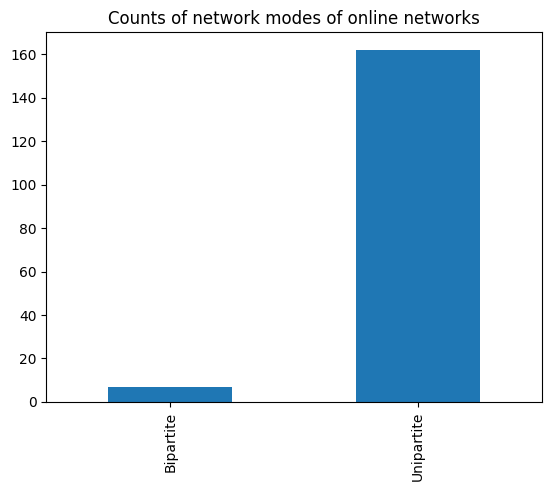

In [11]:
all_online_networks["mode"].value_counts().sort_values().plot(kind = 'bar')
plt.title("Counts of network modes of online networks")

Text(0.5, 1.0, 'Distribution of Network Diameters')

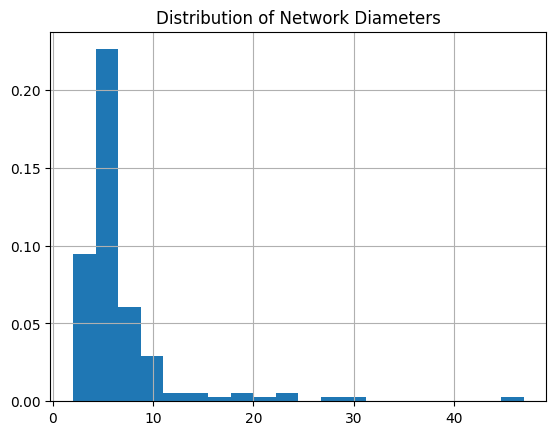

In [12]:
all_online_networks["diameter"].hist(density = True, bins = 20)
plt.title("Distribution of Network Diameters")

Calculating the distribution of the global clustering coefficients is important, because
the **global similarity coefficient** is the same as global clustering coefficient,
see page 4 (4):

>Global similarity. From the global perspective both local clustering and local closure lead to the same conclusion   
that the corresponding global measure is just the fraction of triples that can be closed to make a triangle.  
This implies that the same quantity is also the proper global measure of the extent to which relations are driven  
by similarity. In other words, global similarity coefficient is equal to the standard global clustering coefficient.

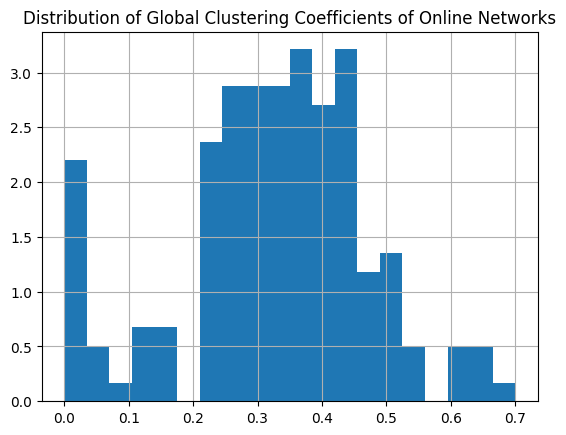

In [13]:
all_online_networks["global_clustering"].hist(density = True, bins = 20)
plt.title("Distribution of Global Clustering Coefficients of Online Networks")
plt.savefig(FIGURE_DIR_PATH / 'global_clustering_coefficients.svg', format='svg', dpi=1200)
plt.savefig(FIGURE_DIR_PATH / 'global_clustering_coefficients.pdf', format='pdf', dpi=1200)
plt.savefig(FIGURE_DIR_PATH / 'global_clustering_coefficients.png', format='png', dpi=1200)

In [ ]:
all_online_networks["assortativity"].hist(density = True, bins = 20)
plt.title("Distribution of Global Clustering Coefficients of Online Networks")

In [16]:
all_online_networks.head()

,group,name,nodes,edges,avg_degree,std_dev_degree,largest_eigenvalue_hashimoto,random_walk_mixing_time,degree_assortativity,global_clustering,diameter,relative_size_of_largest_component,kind,mode,node_properties,edge_properties,gml_file_size,nodes_qcut
0,douban,douban,154908,327162,4.22,11.75,39.78,103.63,-0.18,0.01,9,1.00,Undirected,Unipartite,NaN,NaN,3460300,large
1,ego_social,facebook_0,333,2519,15.13,15.51,35.79,172.26,0.24,0.43,11,0.97,Undirected,Unipartite,name feat circles,NaN,22528,small
2,ego_social,facebook_107,1034,26749,51.74,47.00,122.05,51.91,0.43,0.50,9,1.00,Undirected,Unipartite,name feat circles,NaN,121856,medium
3,ego_social,facebook_348,224,3192,28.50,22.37,48.64,81.92,0.22,0.49,9,1.00,Undirected,Unipartite,name feat circles,NaN,19456,small
4,ego_social,facebook_414,150,1693,22.57,13.06,34.42,243.01,0.31,0.65,7,0.99,Undirected,Unipartite,name feat circles,NaN,11264,small
